In [1]:
#########################################
# ANN on MNIST Fashion Dataset
# By Giriraj Vaishnav
#########################################

4431872/4422102 [==============================] - 0s 0us/step


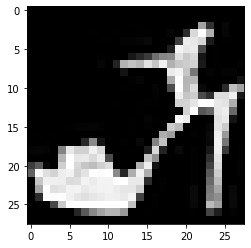

In [3]:
# Loading the MNIST Dataset

from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
(X_train,y_train), (X_test, y_test)= fashion_mnist.load_data()
plt.subplot()
plt.imshow(X_train[9], cmap=plt.get_cmap('gray'))

In [4]:
# Importing necessary libraries

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adam
from keras.utils import np_utils

In [5]:
# Reshape the Data

number_pix=X_train.shape[1]*X_train.shape[2] 
X_train=X_train.reshape(X_train.shape[0], number_pix).astype('float32')
X_test=X_test.reshape(X_test.shape[0], number_pix).astype('float32')

In [6]:
# Normalize the data

X_train=X_train/255
X_test=X_test/255
y_train= np_utils.to_categorical(y_train)
y_test= np_utils.to_categorical(y_test)
num_classes=y_train.shape[1]
print(num_classes)

10


In [7]:
# Training the ANN model

model=Sequential()
model.add(Dense(number_pix, input_dim=number_pix, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
H = model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 19s - loss: 0.5117 - accuracy: 0.8209 - val_loss: 0.4187 - val_accuracy: 0.8528
Epoch 2/10
300/300 - 4s - loss: 0.3718 - accuracy: 0.8683 - val_loss: 0.3958 - val_accuracy: 0.8592
Epoch 3/10
300/300 - 4s - loss: 0.3347 - accuracy: 0.8780 - val_loss: 0.3622 - val_accuracy: 0.8706
Epoch 4/10
300/300 - 4s - loss: 0.3086 - accuracy: 0.8888 - val_loss: 0.3522 - val_accuracy: 0.8733
Epoch 5/10
300/300 - 4s - loss: 0.2876 - accuracy: 0.8946 - val_loss: 0.3345 - val_accuracy: 0.8836
Epoch 6/10
300/300 - 4s - loss: 0.2742 - accuracy: 0.8988 - val_loss: 0.3366 - val_accuracy: 0.8749
Epoch 7/10
300/300 - 4s - loss: 0.2606 - accuracy: 0.9039 - val_loss: 0.3209 - val_accuracy: 0.8837
Epoch 8/10
300/300 - 4s - loss: 0.2464 - accuracy: 0.9090 - val_loss: 0.3248 - val_accuracy: 0.8853
Epoch 9/10
300/300 - 4s - loss: 0.2352 - accuracy: 0.9130 - val_loss: 0.3325 - val_accuracy: 0.8805
Epoch 10/10
300/300 - 4s - loss: 0.2255 - accuracy: 0.9154 - val_loss: 0.3183 - val_accuracy: 0.885

In [8]:
# Evaluating the model

score= model.evaluate(X_test, y_test, verbose=0)
print('The error is: %.2f%%'%(100-score[1]*100))

The error is: 11.45%


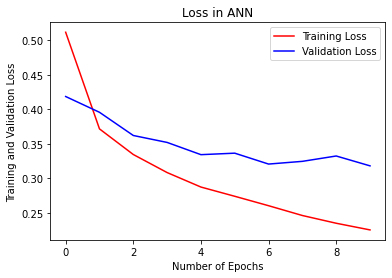

In [9]:
# Ploting the graph for Training and Validation Loss

from matplotlib import pyplot as plt
plt.plot(range(0,10), H.history["loss"], "r", label = "Training Loss")
plt.plot(range(0,10), H.history["val_loss"], "b", label = "Validation Loss")
plt.title("Loss in ANN")
plt.legend(loc = "upper right")
plt.xlabel("Number of Epochs")
plt.ylabel("Training and Validation Loss")
plt.show()

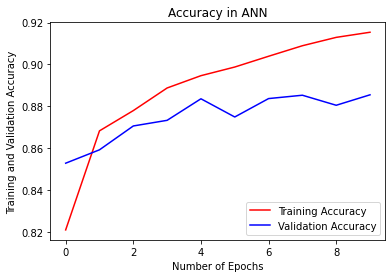

In [10]:
# Ploting the graph for Training and Validation Accuracy

from matplotlib import pyplot as plt
plt.plot(range(0,10), H.history["accuracy"], "r", label = "Training Accuracy")
plt.plot(range(0,10), H.history["val_accuracy"], "b", label = "Validation Accuracy")
plt.title("Accuracy in ANN")
plt.legend(loc = "lower right")
plt.xlabel("Number of Epochs")
plt.ylabel("Training and Validation Accuracy")
plt.show()

In [11]:
# Predicting the Test Set

pred_labels = model.predict_classes(X_test)
print(pred_labels)
test_label = np.argmax(y_test, axis=1)
print(test_label)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[9 2 1 ... 8 1 5]
[9 2 1 ... 8 1 5]


In [12]:
# Confusion matrix

from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(test_label, pred_labels)
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[801   2  13  52   7   2 116   0   7   0]
 [  0 979   0  15   3   0   3   0   0   0]
 [  8   0 735  21 159   0  77   0   0   0]
 [  9  12   7 921  34   0  13   0   4   0]
 [  0   1  40  26 894   0  37   0   2   0]
 [  0   0   0   1   0 967   0  26   0   6]
 [ 95   3  64  63 100   0 662   0  13   0]
 [  0   0   0   0   0   9   0 978   0  13]
 [  3   0   3   7   4   2   2   1 978   0]
 [  0   0   0   0   0  10   1  49   0 940]]


In [13]:
# Classification report for precision, recall f1-score and accuracy

from sklearn.metrics import classification_report

report = classification_report(test_label,pred_labels)
print('Classification report : \n',report)

Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.80      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.85      0.73      0.79      1000
           3       0.83      0.92      0.87      1000
           4       0.74      0.89      0.81      1000
           5       0.98      0.97      0.97      1000
           6       0.73      0.66      0.69      1000
           7       0.93      0.98      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.88     10000
weighted avg       0.89      0.89      0.88     10000

